# Thoracic Surgery for Lung Cancer
---

<img style="float: left; margin-left: 10px; margin-right: 30px; height: 200px" src="img/lung_cancer_surgery.jpg">

<p>Lung cancer is the leading cause of cancer-related deaths in the world. In the United States, lung cancer claims more lives every year than colon cancer, prostate cancer, and breast cancer combined.</p>

<p>The American Cancer Society’s estimates for lung cancer in the United States for 2018 are:
<ul>
<li>About 234,030 new cases of lung cancer (121,680 in men and 112,350 in women)
<li>About 154,050 deaths from lung cancer (83,550 in men and 70,500 in women) 
</ul>
</p>

<p>Despite the very serious prognosis (outlook) of lung cancer, some people with earlier stage cancers are cured. More than 430,000 people alive today have been diagnosed with lung cancer at some point.</p>


### Abstract
---

<p>The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients: class 1 - death within one year after surgery, class 2 - survival.</p>



### Data Set Information
---

<img style="float: left; margin-left: 10px; margin-right: 30px; height: 120px" src="img/med_univ_wroclaw.jpg">

<p>The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007-2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.</p>

|   Attribute  |  Description  |
|:--------------|:--------------|
|   **Diagnosis**  | ICD-10 codes for primary and secondary as well multiple tumors if any |
|   **FVC**  | Forced vital capacity |
|   **FEV1**  | Volume that has been exhaled at the end of the first second of forced expiration |
|   **Performance**  | Performance status on Zubrod scale, Good (0) to Poor (2) |
|   **Pain**  | Pain before surgery (T = 1, F = 0)  |
|   **Haemoptysis**  | Haemoptysis before surgery (T = 1, F = 0) |
|   **Dyspnoea**  | Dyspnoea before surgery (T = 1, F = 0)  |
|   **Cough**  | Cough before surgery (T = 1, F = 0)   |
|   **Weakness**  | Weakness before surgery (T = 1, F = 0)  |
|   **Pain**  | Pain before surgery (T = 1, F = 0)  |
|   **Tumor_Size**  |  T in clinical TNM - size of the original tumor, 1 (smallest) to 4 (largest) |
|   **Diabetes_Mellitus**  | Type 2 diabetes mellitus (T = 1, F = 0)   |
|   **MI_6mo**  | Myocardial infarcation (Heart Attack) up to 6 months (T = 1, F = 0)   |
|   **PAD**  | Peripheral arterial diseases (T = 1, F = 0)   |
|   **Smoking**  | Smoking (T = 1, F = 0)   |
|   **Asthma**  | Asthma (T = 1, F = 0)   |
|   **Age**  | Age at surgery   |
|   **Death_1yr**  | 1 year survival period - (T) value if died (T = 1, F = 0)    |


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/ThoracicSurgery.csv')

In [5]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [6]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [7]:
# Stats for live and death after 1 yr patients
live = df[df['Death_1yr'] == 0]
death = df[df['Death_1yr'] == 1]

cond = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
        'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]

ld = pd.DataFrame(data={'Attribute': cond, 'Live 1yr Mean': l, 'Death 1yr Mean': d})
ld = ld.set_index('Attribute')

print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(df.Death_1yr)*100))
ld

Death: 69, Live: 385
1 year death: 15.20% out of 454 patients


,Death 1yr Mean,Live 1yr Mean
Attribute,,
FVC,3.195072,3.304597
FEV1,2.383188,2.540805
Performance,0.913043,0.774026
Pain,0.101449,0.051948
Haemoptysis,0.202899,0.124675
Dyspnoea,0.115942,0.044156
Cough,0.797101,0.677922
Weakness,0.246377,0.158442
Tumor_Size,2.014493,1.683117


### How many patients died in 1 year?

---

<img style="float: left; margin-left: 10px; margin-right: 30px; height: 120px" src="img/lung_cancer.jpg">

Out of the 454 patients, 69 did not survive 1 year after their operations, which is 15.20% of the total sample size.

Looking at the means of the two different patient classes, there are features with significant differences and those with minor. However, just looking at the numbers without scaling them appropriately to each other makes comparison difficult. So, let's do an approxiate normalization of each value for convenient comparison.


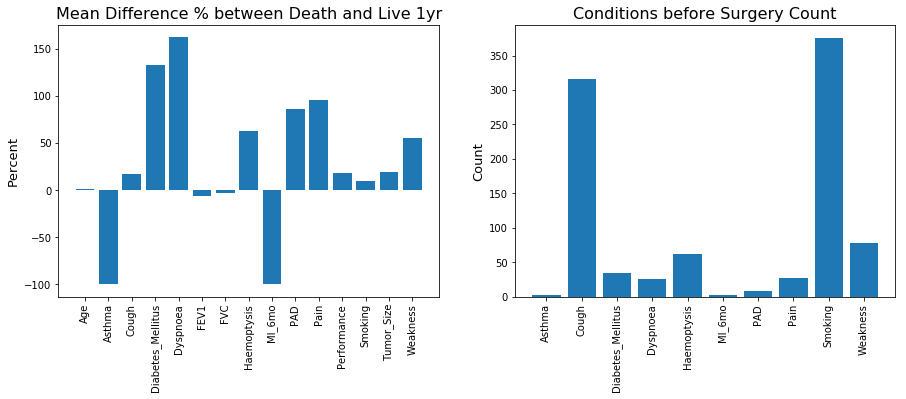

In [51]:
# Percentage difference in means of live vs death patients
d = np.array(d)
l = np.array(l)

p_diff = (d-l)/l*100

fig, axes = plt.subplots(1,2,figsize=(15,5))

axes[0].bar(cond, p_diff)
axes[0].set_title('Mean Difference % between Death and Live 1yr', fontsize=16)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)

# Count plot of true/false condition columns

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma']
tf_sum = [df[col].sum() for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Count', fontsize=13)
axes[1].set_title('Conditions before Surgery Count', fontsize=16)

plt.show()

### What are the differences for the 1 year death patients?
---

<img style="float: right; margin-left: 10px; margin-right: 30px; height: 110px" src="img/steth.png">

Looking at the graph, one can see easily compare the attributes to determine features of significance.
The most notable attributes for those who died are *Dyspnoea*, *Diabetes Mellitus*, *Pain*, *PAD*, and *Haemoptysis* (in decreasing order). *Asthma* and *MI of 6 months* have negative 100% values, but looking at the numerical values reveals that those who died did not have asthma or MI. 
Although the mean differences are useful, further investigation of the number of instances of each attributes in combination with the mean differences will improve our decision on what features to focus on.

The count of *Cough* and *Smoking* are most noteworthy indicating these conditions are strongly correlated to those patients who are to receive thoracic surgery for lung cancer, but the mean differences are small compared to other values. Looking at the count graph for features to note from the mean differences graph, most of these values are small. The overall count should be considered when comparing mean differences, because the lower count numbers will have larger fluctuations to small differences, which may be due to chance.

Hypothesis testing of these features may give some insight into the confidence levels of these values.

### Categorical Data (Diagnosis, Tumor_Size, Performance)
---

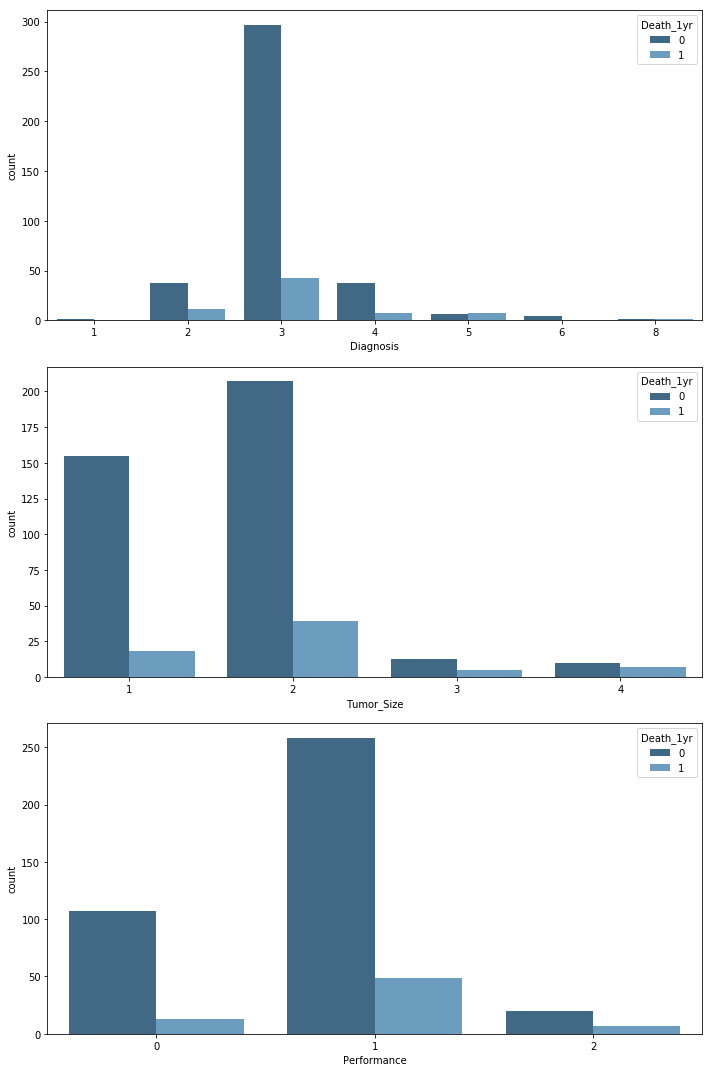

In [63]:
# Count plots of Diagnosis, Tumor_Size, Performance with difference of live and death data

fig, axes = plt.subplots(3,1,figsize=(10,15))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[0])
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[1])
sns.countplot(x='Performance', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[2])

plt.tight_layout()

#### Analysis of live and death patients for Diagnosis, Tumor_Size, and Performance

<img style="float: left; margin-left: 0px; margin-right: 15px; height: 150px" src="img/diag.png">

For Diagnosis, the large majority of patients are in category 3. The other categories are relatively small while category 4, 2, and 5 are noteworthy in that order. The proportion of live to death at a glance seems to be similar for the diagnosis categories except for 5, where the death count is higher than the live count, which may indicate this diagnosis is deadlier than the others.

For Tumor Size, categories 1 and 2 are the majority with 3 and 4 being the fewer group. At a glance, the proportion of the death to live generally increases with the tumor size ranging from 1 to 4. Category 4 tumor size is most even in its split between death and live patient data.

For Performance, categories are 1, 0, 2 in decreasing order of count. Performance 0 category reveals low death count and good proportion to live data, which makes sense since on the Zubrod scale 0 is good and 2 is poor. Category 1 and 2 display similar proportion to live and dead patients, but with category 1 having a majority of the count. 

### Numerical Data (Age, FVC, FEV1)
---

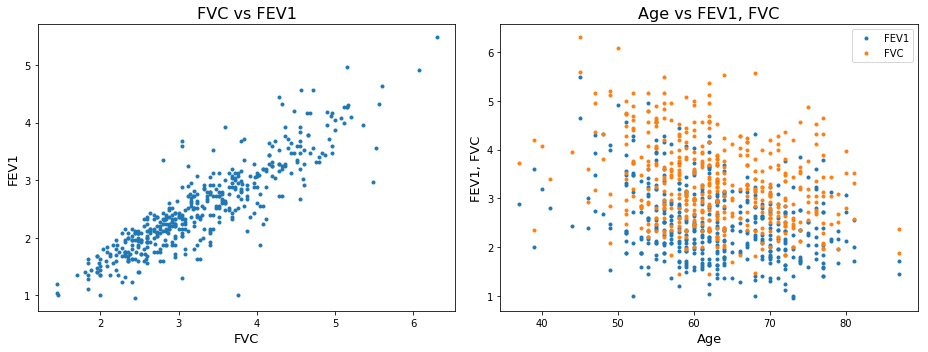

In [33]:
# Scatter plot for FVC, FEV1, Age columns

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(df.FVC, df.FEV1, linestyle='none', marker='.')

axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

axes[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')
axes[1].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1, FVC', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs FEV1, FVC', fontsize=16)

plt.tight_layout()

In [11]:
# Correlation coefficient for FVC and FEV1
np.corrcoef(df.FVC, df.FEV1)[0,1]

0.88754527338290001

#### Correlation between FVC and FEV1

<img style="float: left; margin-left: 0px; margin-right: 0px; height: 110px" src="img/fvc.png">

From looking at the graphs, one can see a strong positive correlation between FVC and FEV1, while Age does not seem to have any significant correlation with either except displaying a mild negative trend. The correlation coefficient calculated for FVC and FEV1 is *0.89*, which is a strong correlation. The mild negative trend for age against the other features makes intuitive sense as it would be expected that as you get older, your lung capacity decreases.

In [13]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""    
    n = len(data)    
    x = np.sort(data)    
    y = np.arange(1, n+1) / n    
    return x, y

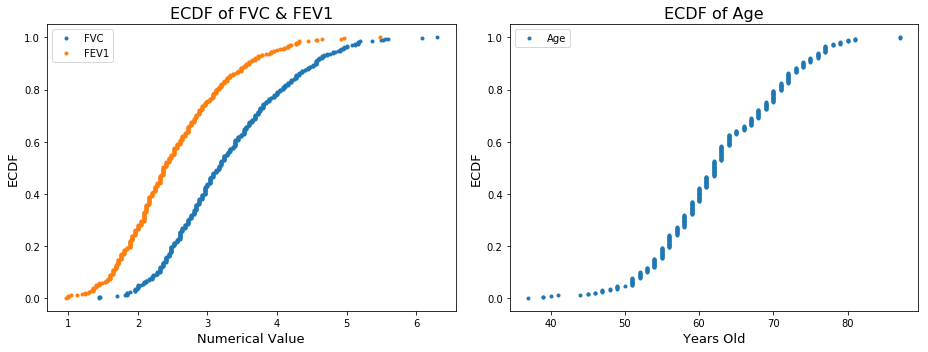

In [34]:
# ECDF of FVC, FEV1, Age
x_fvc, y_fvc = ecdf(df.FVC)
x_fev1, y_fev1 = ecdf(df.FEV1)
x_age, y_age = ecdf(df.Age)

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(x_fvc, y_fvc, marker='.', linestyle='none', label='FVC')
axes[0].plot(x_fev1, y_fev1, marker='.', linestyle='none', label='FEV1')

axes[0].set_xlabel('Numerical Value', fontsize=13)
axes[0].set_ylabel('ECDF', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].set_title('ECDF of FVC & FEV1', fontsize=16)

axes[1].plot(x_age, y_age, marker='.', linestyle='none', label='Age')
axes[1].set_xlabel('Years Old', fontsize=13)
axes[1].set_ylabel('ECDF', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].set_title('ECDF of Age', fontsize=16)

plt.tight_layout()

#### Distribution of Numerical Data

All numerical data display fairly normal distributions. FVC and FEV1 are comparable in their distribution with different means; FEV with its mean at 2.52 and FVC at 3.29. Age mean is at 63.


<p>Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?</p>

<p>Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?
</p>